In [22]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [23]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [63]:
print(mnist.train.images.shape, mnist.validation.images.shape, mnist.test.images.shape)
print(mnist.train.labels.shape, mnist.validation.labels.shape, mnist.test.labels.shape)

(55000, 784) (5000, 784) (10000, 784)
(55000, 10) (5000, 10) (10000, 10)


In [32]:
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

def display_digit(x_train, y_train, num):
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()


In [92]:
x_train, y_train = TRAIN_SIZE(55000)
x_test, y_test = TEST_SIZE(1000)
# display_digit(x_train, y_train, 4)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (1000, 784)
y_test Examples Loaded = (1000, 10)


In [93]:
LEARNING_RATE = 0.1
TRAIN_STEPS = 1000

sess = tf.Session()

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

l1 = tf.layers.dense(x, units=100)
l2 = tf.layers.dense(l1, units=10)

y = tf.nn.softmax(l2)

sess.run(tf.global_variables_initializer())

loss = tf.losses.mean_squared_error(labels=y_, predictions=y)
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
for i in range(TRAIN_STEPS+1):
    _, loss_value = sess.run((training, loss), feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + 
              str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss =  ' + str(loss_value))

Training Step:0  Accuracy =  0.168  Loss =  0.09016762
Training Step:100  Accuracy =  0.44  Loss =  0.076465555
Training Step:200  Accuracy =  0.629  Loss =  0.06277474
Training Step:300  Accuracy =  0.683  Loss =  0.05273341
Training Step:400  Accuracy =  0.722  Loss =  0.045975674


(784, 10)


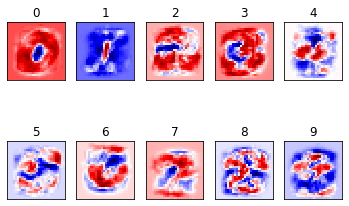

In [54]:
# Visualize
ws = sess.run(w1)
for i in range(10):
    plt.subplot(2, 5, i+1)    
    weight = ws[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

plt.show()

In [15]:
import librosa
import numpy as np

s, sr=librosa.load("data/train_clean_male.wav", sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load("data/train_dirty_male.wav", sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)
# print(S.shape)
# print(X.shape)
# print(S);
# print(np.abs(S));
